In [1]:
import pickle
import os
import textwrap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
import altair as alt
from altair import datum

from dltools.cov.markup import compute

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p.pickle"

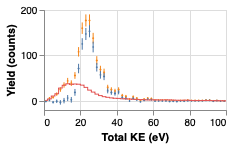

In [62]:
def binit(x):
    return x.groupby_bins("ke", range(0, 150, 2), right=False)


with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = binit(d["Sum[XYZ]"][xkey] + dx / 2).mean()
y = binit(d["Sum[XYZ]"][ykey]).sum()
# where = 0 < y
where = slice(None)

df = pd.concat([
    pd.DataFrame({
        "Total KE (eV)": x[where],
        "Type": "Coinc",
        "Color": "#F58518",
        "Yield (counts)": y[where],
        "Std (counts)": y[where] ** 0.5,
    }),
    pd.DataFrame({
        "Total KE (eV)": x[where],
        "Type": "Cov",
        "Color": "#4C78A8",
        "Yield (counts)": binit(d["Cov[X,Y,Z]"][ykey] * n).sum()[where],
        "Std (counts)": binit((d["Err[Cov[X,Y,Z]]"][ykey] * n) ** 2).sum()[where] ** 0.5,
    }),
    pd.DataFrame({
        "Total KE (eV)": x,
        "Type": "BG",
        "Color": "#E45756",
        "Yield (counts)": y - binit(d["Cov[X,Y,Z]"][ykey] * n).sum(),
        "Std (counts)": np.nan,
    }),
], ignore_index=True)

base = alt.Chart(df, width=182, height=100).encode(
    alt.X(
        "Total KE (eV)",
        scale=alt.Scale(domain=[0, 100], nice=False),
    ),
    y="Yield (counts)",
    yError="Std (counts)",
    color=alt.Color("Color", scale=None),
)
(
    base.transform_filter(datum["Type"] != "BG").mark_errorbar(clip=True)
    + base.transform_filter(datum["Type"] != "BG").mark_point(clip=True, filled=True, size=4, opacity=1)
    + base.transform_filter(datum["Type"] == "BG").mark_line(clip=True, interpolate="step", strokeWidth=1)
)

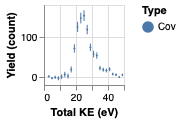

In [59]:
def binit(x):
    return x.groupby_bins("ke", range(0, 200, 2), right=False)


with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = binit(d["Sum[XYZ]"][xkey] + dx / 2).mean()
y = binit(d["Sum[XYZ]"][ykey]).sum()
where = 0 < y

df = pd.concat([
    pd.DataFrame({
        "Total KE (eV)": x[where],
        "Type": "Cov",
        "Yield (count)": binit(d["Cov[X,Y,Z]"][ykey] * n).sum()[where],
        "Std (count)": binit((d["Err[Cov[X,Y,Z]]"][ykey] * n) ** 2).sum()[where] ** 0.5,
    }),   
], ignore_index=True)

base = alt.Chart(df, width=80, height=80).encode(
    alt.X(
        "Total KE (eV)",
        scale=alt.Scale(domain=[0, 50], nice=False),
        axis=alt.Axis(tickCount=5),
    ),
    y="Yield (count)", yError="Std (count)",
    color="Type",
)
base.mark_errorbar(clip=True) + base.mark_point(clip=True, filled=True, size=4, opacity=1)

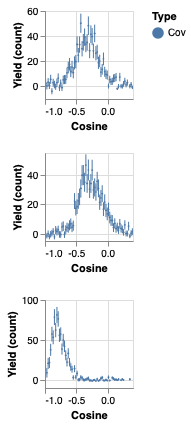

In [4]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "cosang", "h0h1angle"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = d["Sum[XYZ]"][xkey] + dx / 2
y = d["Sum[XYZ]"][ykey]
where = 0 < y

df01 = pd.concat([
#     pd.DataFrame({
#         "Cosine": x[where],
#         "Type": "Coinc",
#         "Name": "1st-2nd",
#         "Yield (count)": y[where],
#         "Std (count)": y[where] ** 0.5,
#     }),
    pd.DataFrame({
        "Cosine": x[where],
        "Type": "Cov",
        "Name": "1st-2nd",
        "Yield (count)": d["Cov[X,Y,Z]"][ykey][where] * n,
        "Std (count)": d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    }),   
], ignore_index=True)

xkey, ykey = "cosang", "h0h2angle"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = d["Sum[XYZ]"][xkey] + dx / 2
y = d["Sum[XYZ]"][ykey]
where = 0 < y

df02 = pd.concat([
#     pd.DataFrame({
#         "Cosine": x[where],
#         "Type": "Coinc",
#         "Name": "1st-3rd",
#         "Yield (count)": y[where],
#         "Std (count)": y[where] ** 0.5,
#     }),
    pd.DataFrame({
        "Cosine": x[where],
        "Type": "Cov",
        "Name": "1st-3rd",
        "Yield (count)": d["Cov[X,Y,Z]"][ykey][where] * n,
        "Std (count)": d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    }),   
], ignore_index=True)

xkey, ykey = "cosang", "h1h2angle"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = d["Sum[XYZ]"][xkey] + dx / 2
y = d["Sum[XYZ]"][ykey]
where = 0 < y

df12 = pd.concat([
#     pd.DataFrame({
#         "Cosine": x[where],
#         "Type": "Coinc",
#         "Name": "2nd-3rd",
#         "Yield (count)": y[where],
#         "Std (count)": y[where] ** 0.5,
#     }),
    pd.DataFrame({
        "Cosine": x[where],
        "Type": "Cov",
        "Name": "2nd-3rd",
        "Yield (count)": d["Cov[X,Y,Z]"][ykey][where] * n,
        "Std (count)": d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    }),   
], ignore_index=True)

df = pd.concat([df01, df02, df12], ignore_index=True)

base = alt.Chart(df, width=88, height=88).encode(
    alt.X(
        "Cosine",
        scale=alt.Scale(domain=[-1, 0.4], nice=False),
    ),
    y="Yield (count)", yError="Std (count)",
    color="Type",
)
fig = alt.vconcat()
for k in ["1st-2nd", "1st-3rd", "2nd-3rd"]:
    b = base.transform_filter(datum["Name"] == k)
    fig &= b.mark_errorbar(clip=True) + b.mark_point(clip=True, filled=True, size=4, opacity=1)
fig

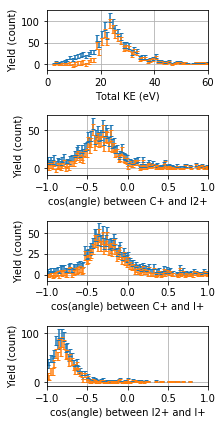

In [21]:
plt.figure(figsize=(3.2, 6))
filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(411)
plt.xlabel("Total KE (eV)")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
)
plt.grid(True)
plt.xlim(0, 60)

xkey, ykey = "cosang", "h0h1angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(412)
plt.xlabel("cos(angle) between C+ and I2+")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
)
plt.grid(True)
plt.xlim(-1, 1)

xkey, ykey = "cosang", "h0h2angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(413)
plt.xlabel("cos(angle) between C+ and I+")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
)
plt.grid(True)
plt.xlim(-1, 1)

xkey, ykey = "cosang", "h1h2angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(414)
plt.xlabel("cos(angle) between I2+ and I+")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
)
plt.grid(True)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()